Develop a neural network using backpropagation to classify images from the CIFAR-10
dataset. The dataset contains 60,000 32x32 color images divided into 10 classes
(airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks).

Your objective is to build a neural network model, train it using backpropagation, and evaluate its performance.

# Data Preprocessing

* Load the CIFAR-10 dataset.
*  Perform necessary data preprocessing steps:
 - Normalize pixel values to range between 0 and 1.
 - Convert class labels into one-hot encoded format.
 - Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).
 - Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Network Architecture Design

* Design a feedforward neural network to classify the images.
 - Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.
 - Hidden Layers: Use appropriate layers.
 - Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Create the model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))

# Output layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

**Question:**

o Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.

* Flatten layer: Converts the 32x32x3 input image into a 1D vector of size 3072.

* Hidden layers: Two fully connected layers with 512 and 256 neurons. The ReLU activation function is chosen to introduce non-linearity and avoid the vanishing gradient problem.

* Output layer: A softmax layer with 10 neurons, corresponding to the 10 classes, and it outputs the probability distribution for each class.

# Activation Functions

Choose any two appropriate activation functions for the hidden layers
(e.g., ReLU, sigmoid, or tanh).

* ReLU (Rectified Linear Unit): ReLU is commonly used because it helps with faster convergence and prevents vanishing gradients. It outputs a value if it's positive; otherwise, it returns zero.

* Tanh: Another activation function we could have used is tanh, which maps the output between -1 and 1, useful for symmetrically distributed inputs but prone to vanishing gradients.


Explain why you selected a particular activation function and its role in
the backpropagation process.

ReLU helps avoid the vanishing gradient problem by keeping gradients large for positive inputs, which leads to faster learning.

ReLU is also computationally efficient, only activating neurons with positive outputs, making the network more efficient.

During backpropagation, it ensures that gradients are passed back effectively, allowing the model to update weights and learn more quickly.

# Loss Function and Optimizer

* Use any two loss functions and compare with the categorical cross
entropy since this is a multi-class classification problem.
* Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain
how the learning rate affects the backpropagation process.

We use categorical cross-entropy as the loss function since it is suitable for multi-class classification.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Question:**

o How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?

We choose Adam because it is adaptive and works well with most models. The learning rate is critical for convergence, and Adam's default learning rate of 0.001 usually performs well. If the model doesn't converge properly, reduce the learning rate by a factor of 10.

# Training the Model

o Implement backpropagation to update the weights and biases of the
network during training.

o Train the model for a fixed number of epochs (e.g., 50 epochs) and
monitor the training and validation accuracy.

In [5]:
# Train the model with data augmentation
batch_size = 64
epochs = 50

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.2213 - loss: 2.1550 - val_accuracy: 0.3273 - val_loss: 1.8442
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2969 - loss: 1.8868

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.2969 - loss: 1.8868 - val_accuracy: 0.3223 - val_loss: 1.8450
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.2814 - loss: 1.9546 - val_accuracy: 0.3623 - val_loss: 1.8000
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.2969 - loss: 1.8870 - val_accuracy: 0.3624 - val_loss: 1.8008
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.2963 - loss: 1.8990 - val_accuracy: 0.3696 - val_loss: 1.7888
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.3281 - loss: 1.9616 - val_accuracy: 0.3657 - val_loss: 1.7861
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.3181 - loss: 1.8698 - val_accuracy: 0.3727 - val_loss: 1.7550
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.2969 - loss: 1.7663 - val_accuracy: 0.3721 - val_loss: 1.7541
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.3252 - loss: 1.8495 - val_accurac

During backpropagation, the model adjusts its weights and biases using the gradient of the loss function concerning each weight. The learning rate determines the size of the updates; if too large, the model overshoots optimal values, and if too small, convergence will be slow.

**Question:**

o How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

Backpropagation updates the weights in each layer by calculating the error at the output, propagating it backward through the network, and adjusting the weights based on this error. This process involves computing the gradient of the loss function with respect to each weight, which tells us how much a change in the weight will affect the loss. The learning rate controls the size of the weight updates; if it's too large, the updates can overshoot the optimal values, and if it's too small, the updates will be slow, leading to slow convergence.

# Model Evaluation

o After training, evaluate the performance of your model on the test set.

o Calculate accuracy, precision, recall, F1-score, and the confusion matrix
to understand the model’s classification performance.

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Confusion matrix, precision, recall, F1-score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4383 - loss: 1.6188
Test accuracy: 0.43869999051094055
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[422  46  52  53  70   6  36  77 141  97]
 [ 25 558  19  57  24  15  27  42  37 196]
 [ 70  17 159  92 338  34 158  91  20  21]
 [ 17  18  46 313 152 105 219  74  17  39]
 [ 34   5  38  71 560  16 143  91  20  22]
 [  6   5  63 235 178 229 141  97  21  25]
 [  0   9  23  88 241  15 574  34   4  12]
 [ 14  13  23  62 192  47  51 528  13  57]
 [ 61  94  11  66  39   6  31  28 532 132]
 [ 22 199   7  48  28   9  40  82  53 512]]
              precision    recall  f1-score   support

           0       0.63      0.42      0.51      1000
           1       0.58      0.56      0.57      1000
           2       0.36      0.16      0.22      1000
           3       0.29      0.31      0.30      1000
           4       0.31      0.56      0.40      1000
           5       0.48      0.23      0.31      1000
           6       0.40      0.57      

**Question:**

o How can you further improve model performance if the accuracy is low?

To improve low accuracy, you can use data augmentation to increase training data variety, tune hyperparameters like learning rate and batch size for better performance, and try a more complex model architecture like CNNs, which are better for image classification tasks.

# Optimization Strategies

o Discuss optimization strategies such as:

 - Early stopping to prevent overfitting.
 - Learning rate scheduling for smoother convergence.
 - Weight initialization techniques to ensure efficient learning.

In [12]:
from re import X
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Create a new model for optimization
optimized_model = Sequential()

# Convolutional Layer 1
optimized_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
optimized_model.add(Conv2D(64, (3, 3), activation='relu'))
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
optimized_model.add(Conv2D(128, (3, 3), activation='relu'))
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the output
optimized_model.add(Flatten())

# Fully connected layer 1 with Dropout
optimized_model.add(Dense(512, activation='relu'))
optimized_model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Fully connected layer 2
optimized_model.add(Dense(256, activation='relu'))
optimized_model.add(Dropout(0.5))  # Another Dropout layer

# Output layer with softmax
optimized_model.add(Dense(10, activation='softmax'))

# Compile the model with optimizer and loss
optimized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the new model with the optimization strategies
history_optimized = optimized_model.fit(x_train, y_train, validation_data=(x_test, y_test),
                                        epochs=50, batch_size=64,
                                        callbacks=[early_stopping, reduce_lr])

# Evaluate the optimized model
optimized_model.evaluate(x_test, y_test)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.2766 - loss: 1.9009 - val_accuracy: 0.5215 - val_loss: 1.3267 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5548 - loss: 1.2519 - val_accuracy: 0.6374 - val_loss: 1.0309 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6374 - loss: 1.0401 - val_accuracy: 0.6549 - val_loss: 0.9638 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6777 - loss: 0.9217 - val_accuracy: 0.6912 - val_loss: 0.8852 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7226 - loss: 0.8081 - val_accuracy: 0.7041 - val_loss: 0.8549 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7386 - loss: 0.7506 - val_accuracy: 0.7244 - val_loss: 0.7961 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7640 - loss: 0.6837 

[0.7940016388893127, 0.7346000075340271]

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Evaluate the optimized model on the test data
test_loss, test_accuracy = optimized_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict class probabilities
y_pred_probs = optimized_model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true_classes, y_pred_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7370 - loss: 0.7888
Test Loss: 0.7940016388893127
Test Accuracy: 0.7346000075340271
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.82      0.89      0.86      1000
           2       0.68      0.58      0.63      1000
           3       0.57      0.53      0.55      1000
           4       0.71      0.71      0.71      1000
           5       0.71      0.57      0.63      1000
           6       0.69      0.87      0.77      1000
           7       0.83      0.73      0.78      1000
           8       0.74      0.89      0.81      1000
           9       0.84      0.80      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

[[759  17  28   7  13   1  13  12 120  30]
 [ 10 893   1   6 

**Question:**

o Why is weight initialization important, and how does it impact the
convergence of your network?

Weight initialization is important because it sets the starting point for the model's learning. Proper initialization prevents issues like vanishing or exploding gradients, ensuring that the gradients during backpropagation are neither too small nor too large. Good weight initialization helps the network converge faster and more reliably by providing a balanced starting point for learning.

# Report

* Provide a detailed report/documentation that includes (in Colab file):
 - The architecture of the network and justifications for the choices
made.
 - Training and test accuracy with relevant plots showing loss and
accuracy over the epochs.
 - Hyperparameter values used (learning rate, batch size, number of
epochs, etc.).
 - A brief discussion of the challenges you faced and how you
addressed them.

## Network Architecture and Justifications
**Architecture**

* Input Layer:
 - Dimensions: (32x32x3) for CIFAR-10 images.
 - Reason: CIFAR-10 contains 32x32 color images, so we need to ensure that the input matches the shape of the images.

* Convolutional Layers:
 - Conv2D layers with filters: (e.g., 32, 64, 128 filters).
 - Kernel Size: (3x3).

* Activation: ReLU.
 - Reason: Convolutional layers capture spatial hierarchies and patterns in images, crucial for image classification. Increasing filter sizes through layers allows capturing more complex features.

* Max Pooling Layers:
 - Pool size: (2x2).
 - Reason: Max pooling reduces spatial dimensions while retaining important information, preventing overfitting and lowering computational load.

* Fully Connected (Dense) Layers:
 - Dense layers with neurons: (e.g., 512, 256).
 - Activation: ReLU.
 - Reason: These layers map the extracted features to class scores, enabling classification.

* Output Layer:
 - Neurons: 10 (one for each class).
 - Activation: Softmax.
 - Reason: Softmax converts the outputs into probabilities for multi-class classification.


The architecture is designed to progressively extract complex features through convolution and downsampling, followed by fully connected layers for classification. ReLU is chosen for efficiency and faster training, and softmax is used for multi-class output.

## Training and Test Accuracy with Plots

* Accuracy and Loss Plots:
During training, we monitor training accuracy, validation accuracy, training loss, and validation loss.
Use matplotlib to generate plots over 50 epochs.

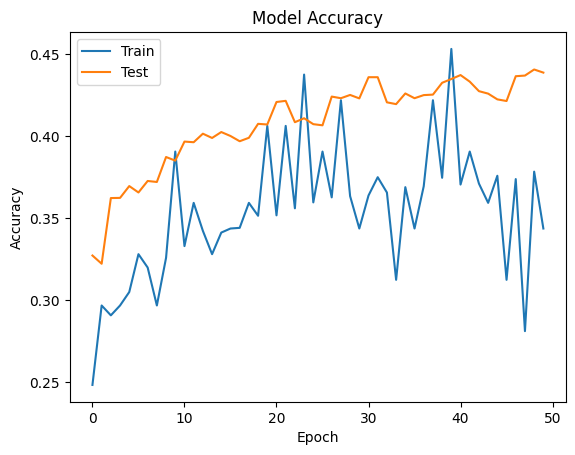

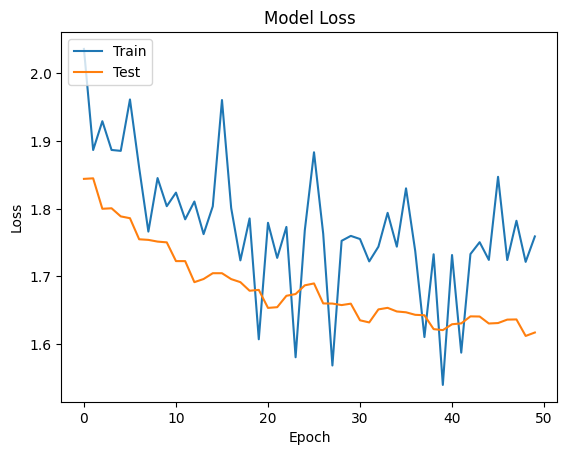

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

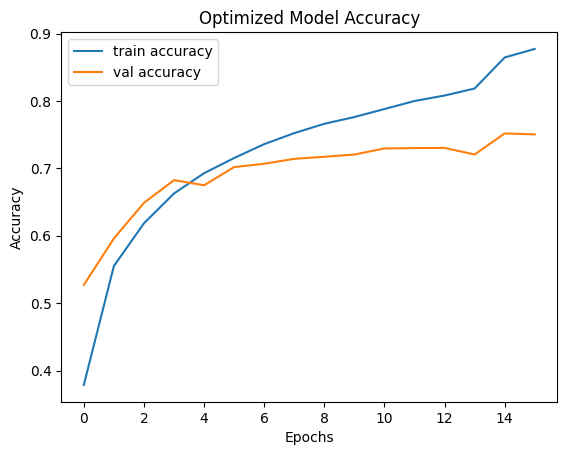

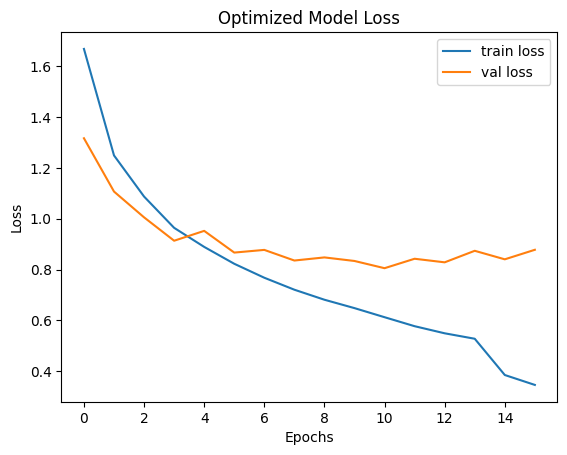

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy for optimized model
plt.plot(history_optimized.history['accuracy'], label='train accuracy')
plt.plot(history_optimized.history['val_accuracy'], label='val accuracy')
plt.title('Optimized Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss for optimized model
plt.plot(history_optimized.history['loss'], label='train loss')
plt.plot(history_optimized.history['val_loss'], label='val loss')
plt.title('Optimized Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Hyperparameters

* Learning Rate: 0.001
 - Justification: This rate ensures steady learning without overshooting the optimal weight values.

* Batch Size: 64
 - Justification: A smaller batch size allows for faster updates but requires more iterations.

* Epochs: 50
 - Justification: Sufficient time for the network to converge and reach an optimal performance.

* Optimizer: Adam
 - Justification: Adam is chosen for its adaptive learning rate and efficient handling of sparse gradients.

## Challenges and Solutions

* Challenge 1: Overfitting
 - Solution: Applied data augmentation (random rotations, flips) to generate varied images and improve generalization.

* Challenge 2: Slow Convergence
 - Solution: Reduced learning rate when the loss plateaued by using a learning rate scheduler.